# Titanic - Machine Learning from Disaster <a class="anchor" id="zero-bullet"></a>

## Table of contents:
1. [Imports](#first-bullet)
2. [Data processing](#second-bullet)
3. [Data spliting](#third-bullet)
4. [Modeling](#fourth-bullet)
    * [Decision Tree Classifier](#fifth-bullet)
    * [Random Forest Classifier](#sixth-bullet)
5. [Algorithm prediction - validation data](#seventh-bullet)

## Imports <a class="anchor" id="first-bullet"></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
from collections import Counter
import re

for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))   

validation=pd.read_csv('input/test.csv', index_col=0)
data=pd.read_csv('input/train.csv', index_col=0)

input\gender_submission.csv
input\test.csv
input\train.csv
input\.ipynb_checkpoints\gender_submission-checkpoint.csv
input\.ipynb_checkpoints\test-checkpoint.csv
input\.ipynb_checkpoints\train-checkpoint.csv


In [6]:
#raw data table
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Data processing steps (skip that part and go to the function)

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Sex

In [8]:
# Male=0; Famale=1
data['Sex'].replace('female', 0, inplace=True)
data['Sex'].replace('male', 1, inplace=True)

### Age

mean value of age is 29.69911764705882
median value of age is 28.0
mode value of age is 24.0


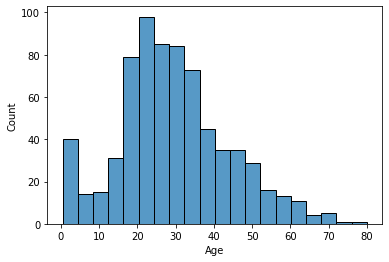

In [9]:
sns.histplot(data.Age)
#data.Age.plot.hist()

mean_age = data["Age"].mean()
median_age = data["Age"].median()
mode_age = data["Age"].mode().item()

print("mean value of age is",mean_age)
print("median value of age is",median_age)
print("mode value of age is",mode_age)

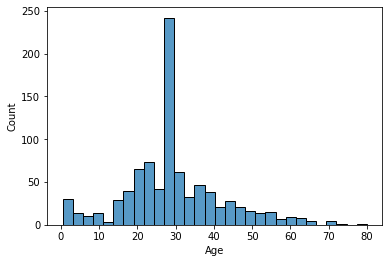

In [10]:
# Filling empty cells with median age value
data['Age'] = data['Age'].replace(np.nan, median_age)
sns.histplot(data.Age)

### Embarked

In [11]:
Counter = Counter(data['Embarked'])
most_common = Counter.most_common(1)
print(Counter)
print(most_common)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})
[('S', 644)]


In [12]:
# Fill empty cells with the most common value of Embarked
data['Embarked'] = data['Embarked'].replace(np.nan, 'S')

#data.Embarked.unique()
# data['EmbarkedS']=data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
# data['EmbarkedC']=data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
# data['EmbarkedQ']=data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)

# One Hot encoding columns:
dummies_embarked = pd.get_dummies(data.Embarked, prefix='Embarked_')
data = pd.concat([data, dummies_embarked], axis=1)

### Cabin

In [13]:
# consider the cabin number
# data.Cabin.fillna('X', inplace=True)
# import re

# maxi = len(data.Cabin) + 1
# Cabin_num_list = [] 
   
# for i in range(1,maxi):
#     s = data.Cabin[i]
#     res = re.findall('(\d+|[A-Za-z]+)', s) 
#     cab = res[-1]
#     if cab.isalpha():
#         Cabin_num_list.append(0)
#     else:
#         Cabin_num_list.append(int(cab))
#-----
#data.insert(10, "Cabin_num", Cabin_num_list)

#data.Cabin_num = pd.to_numeric(data.Cabin_num)

#data.Cabin_num.fillna(0, inplace=True)

In [14]:
# Fill empty cells with X
data.Cabin.fillna('X', inplace=True)

# consider the cabin letter
data.Cabin=data.Cabin.apply(lambda x: x[0])

# One Hot encoding columns:
dummies_cabin = pd.get_dummies(data.Cabin, prefix='Cabin_')
data = pd.concat([data, dummies_cabin], axis=1)

In [15]:
#consider the cabin letter
data.Cabin=data.Cabin.apply(lambda x: x[0])

#One Hot encoding columns:
dummies_cabin = pd.get_dummies(data.Cabin, prefix='Cabin_')
data = pd.concat([data, dummies_cabin], axis=1)

In [16]:
data.drop(['Embarked','Name','Ticket','Cabin'], axis=1, inplace=True, errors='ignore')


## Data processing <a class="anchor" id="second-bullet"></a>

In [20]:
def data_processing(data):
    data['Sex'].replace('female', 0, inplace=True)
    data['Sex'].replace('male', 1, inplace=True)
    
    # Fill empty Age cells with median value
    median_age = data["Age"].median()
    data['Age'] = data['Age'].replace(np.nan, median_age)
    
    # Fill empty Embarked cells with the most common value 'S'
    data['Embarked'] = data['Embarked'].replace(np.nan, 'S')
    # One Hot encoding columns:
    dummies_embarked = pd.get_dummies(data.Embarked, prefix='Embarked')
    data = pd.concat([data, dummies_embarked], axis=1)
    
    # Fill empty Cabin cells with 'X'
    data.Cabin.fillna('X', inplace=True)
    # Consider the cabin letter
    data.Cabin=data.Cabin.apply(lambda x: x[0])
    # One Hot encoding columns:
    dummies_cabin = pd.get_dummies(data.Cabin, prefix='Cabin')    
    data = pd.concat([data, dummies_cabin], axis=1)
    
    data.drop(['Embarked','Name','Ticket','Cabin'], axis=1, inplace=True)
    return(data)

In [21]:
df_val = data_processing(validation)
df_train_and_test = data_processing(data)

In [22]:
df_train_and_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
5,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0,0,1,0,0,0,0,0,0,0,0,1
888,1,1,0,19.0,0,0,30.0000,0,0,1,0,1,0,0,0,0,0,0,0
889,0,3,0,28.0,1,2,23.4500,0,0,1,0,0,0,0,0,0,0,0,1


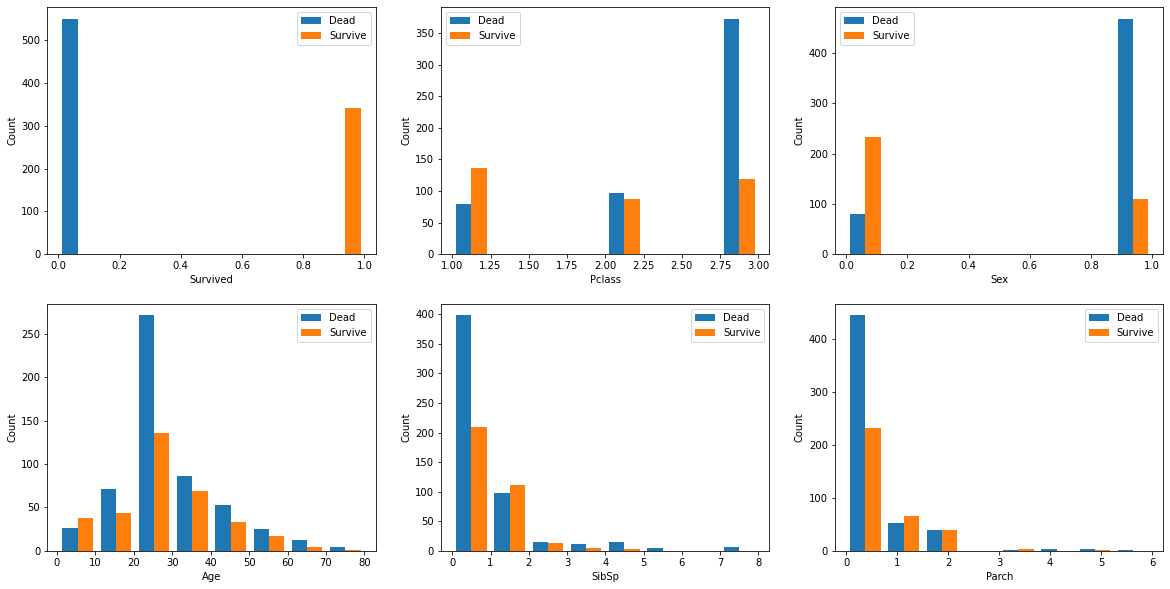

In [23]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
plt.figure(figsize=(20,10))

for ftr in range(len(features)):
    plt.subplot(2,3,ftr+1)
    plt.hist([data[data['Survived']==0][features[ftr]],data[data['Survived']==1][features[ftr]]],bins=8, label=["Dead", "Survive"])
    plt.legend()
    plt.xlabel(features[ftr])
    plt.ylabel('Count')

plt.show()

In [24]:
df_val.columns, df_train_and_test.columns

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
        'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X'],
       dtype='object'),
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
        'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
        'Cabin_X'],
       dtype='object'))

In [25]:
# Additional preparing validation data:

#add missing columns from df_train_and_test to df_val
df_val[[x for x in df_train_and_test.columns if x not in df_val.columns]] = 0

[Back to top](#zero-bullet)

## Data spliting <a class="anchor" id="third-bullet"></a>

In [26]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_train_and_test.copy(), test_size=0.3, random_state=8)

y_train = df_train.pop('Survived')
X_train = df_train

y_test = df_test.pop('Survived')
X_test = df_test

df_val.pop('Survived')
X_val = df_val

In [27]:
# version for cross vaildate
y = df_train_and_test.pop('Survived')
X = df_train_and_test

[Back to top](#zero-bullet)

## Modeling <a class="anchor" id="fourth-bullet"></a>

### Decision Tree Classifier <a class="anchor" id="fifth-bullet"></a>

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import svm, datasets
# now you can import normally from model_selection
from sklearn.model_selection import GridSearchCV

tree_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(10, 16),
    "min_samples_leaf": range(5,9)
}

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
#y_pred = clf.predict(X_test)

# Create Grid search with cross validate
#cv_results = cross_validate(clf, X, y, cv=5)

grid = GridSearchCV(clf, param_grid=tree_param, cv=5, verbose=1, n_jobs=-1)

grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 16),
                         'min_samples_leaf': range(5, 9)},
             verbose=1)

In [29]:
print(pd.DataFrame(grid.cv_results_).mean())
print('--------------\n')
print(pd.DataFrame(grid.cv_results_).head())

mean_fit_time              0.010948
std_fit_time               0.001998
mean_score_time            0.005665
std_score_time             0.001147
param_max_depth           12.500000
param_min_samples_leaf     6.500000
split0_test_score          0.774092
split1_test_score          0.786751
split2_test_score          0.840707
split3_test_score          0.801615
split4_test_score          0.863179
mean_test_score            0.813269
std_test_score             0.034588
rank_test_score           23.270833
dtype: float64
--------------

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.023221      0.005457         0.008403        0.001019   
1       0.022005      0.004515         0.008999        0.002529   
2       0.017597      0.001356         0.008601        0.001497   
3       0.014603      0.001014         0.006801        0.000399   
4       0.014604      0.000495         0.007600        0.001021   

  param_criterion param_max_depth param_min_samples_leaf  \
0 

C:\Users\barto\.conda\envs\musicai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [30]:
print(pd.DataFrame(grid.cv_results_).mean())
print('--------------\n')
print('best parameters:', grid.best_params_)

mean_fit_time              0.010948
std_fit_time               0.001998
mean_score_time            0.005665
std_score_time             0.001147
param_max_depth           12.500000
param_min_samples_leaf     6.500000
split0_test_score          0.774092
split1_test_score          0.786751
split2_test_score          0.840707
split3_test_score          0.801615
split4_test_score          0.863179
mean_test_score            0.813269
std_test_score             0.034588
rank_test_score           23.270833
dtype: float64
--------------

best parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 6}


C:\Users\barto\.conda\envs\musicai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [31]:
#print('The best etimator score result is', grid.best_estimator_.score(X, y))
# Best result considering the average value of the crossing value:
print('The best score result is', grid.best_score_)

results = pd.DataFrame(grid.cv_results_)
results = results.iloc[:,4:]
results = results.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1)
results = results.sort_values(by='rank_test_score')
results

The best score result is 0.826093779423765


,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
13,entropy,13,6,0.826094,0.038598,1
5,entropy,11,6,0.823847,0.036530,2
29,gini,11,6,0.822723,0.035486,3
25,gini,10,6,0.822723,0.035486,3
45,gini,15,6,0.822723,0.035486,3
37,gini,13,6,0.821599,0.036163,6
17,entropy,14,6,0.820476,0.037976,7
1,entropy,10,6,0.820476,0.037976,7
21,entropy,15,6,0.820476,0.034308,7
16,entropy,14,5,0.819365,0.032394,10


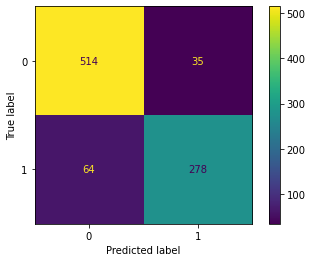

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid, X, y)
plt.show()

# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(grid, X, y)
# plt.show()

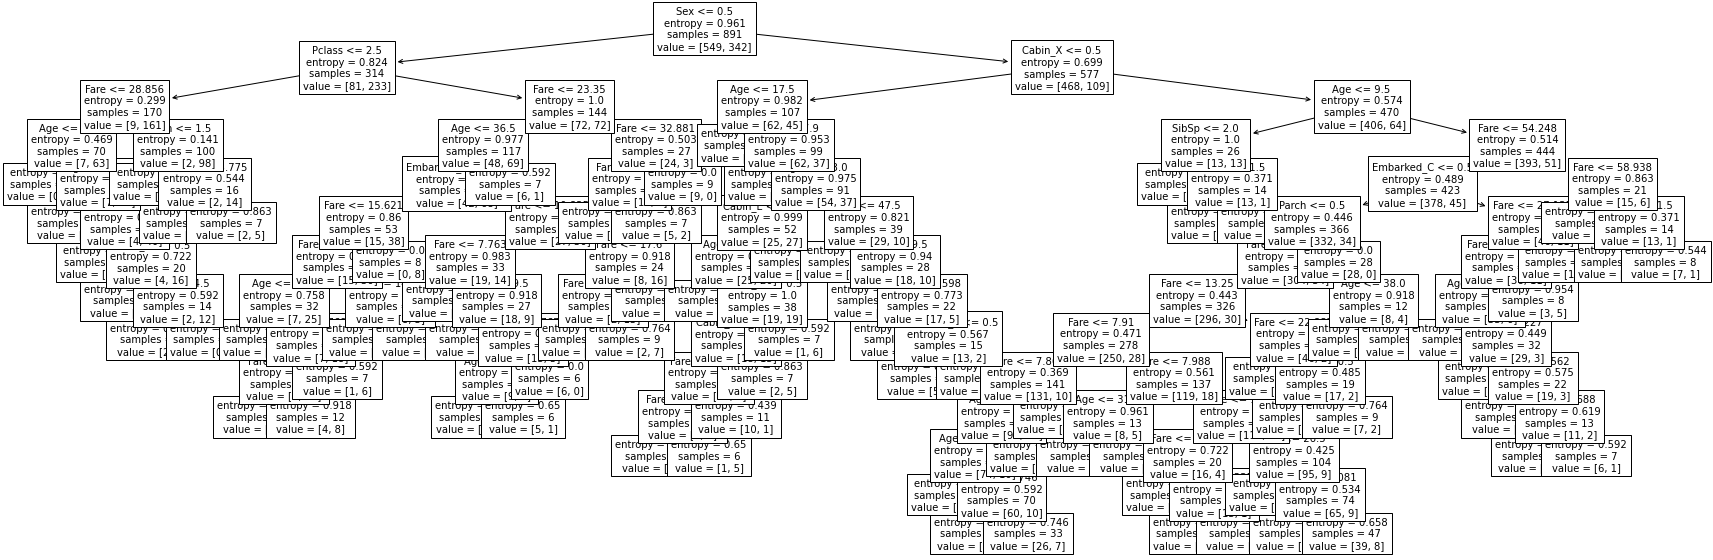

In [34]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(30,10))
tree.plot_tree(grid.best_estimator_, ax=ax, fontsize=10, feature_names=df_train.columns)
plt.show()

### Random Forest Classifier <a class="anchor" id="sixth-bullet"></a>
In this case, I'm using randomized search instead of grid search like in the case with Decision tree.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV

forest_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(10, 16),
    "min_samples_leaf":range(5, 15),
}

rfc = RandomForestClassifier()

rs = RandomizedSearchCV(rfc, param_distributions=forest_param, cv=5, n_iter=70, random_state=0, n_jobs=-1)
rs.fit(X, y)

print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:", rs.best_score_)

Optimal hyperparameter combination: {'min_samples_leaf': 6, 'max_depth': 14, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.8283346933651371


In [36]:
print(pd.DataFrame(rs.cv_results_).mean())
print('-----')
print('best random search parameters:', rs.best_params_)

mean_fit_time              0.684572
std_fit_time               0.094672
mean_score_time            0.068814
std_score_time             0.015236
param_min_samples_leaf     9.142857
param_max_depth           12.385714
split0_test_score          0.786991
split1_test_score          0.816051
split2_test_score          0.857464
split3_test_score          0.796469
split4_test_score          0.833226
mean_test_score            0.818040
std_test_score             0.026667
rank_test_score           35.385714
dtype: float64
-----
best random search parameters: {'min_samples_leaf': 6, 'max_depth': 14, 'criterion': 'entropy'}


C:\Users\barto\.conda\envs\musicai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [37]:
print('The best score result is', rs.best_score_)
rfc_results = pd.DataFrame(rs.cv_results_)

rfc_results = rfc_results.iloc[:,4:]
rfc_results = rfc_results.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1)
rfc_results = rfc_results.sort_values(by='rank_test_score')
rfc_results

The best score result is 0.8283346933651371


,param_min_samples_leaf,param_max_depth,param_criterion,mean_test_score,std_test_score,rank_test_score
56,6,14,entropy,0.828335,0.036889,1
42,5,13,gini,0.828328,0.031987,2
18,6,15,gini,0.828316,0.022898,3
24,5,15,gini,0.828303,0.023291,4
25,8,11,entropy,0.828303,0.021894,4
...,...,...,...,...,...,...
4,12,13,gini,0.805900,0.039568,66
14,14,15,gini,0.804783,0.033997,67
51,13,13,gini,0.803685,0.046169,68
65,14,14,gini,0.802511,0.023789,69


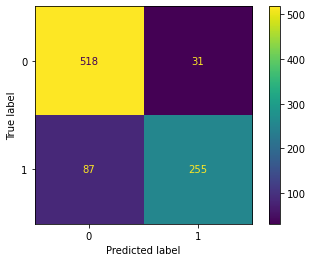

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rs, X, y)
plt.show()

# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(grid, X, y)
# plt.show()

[Back to top](#zero-bullet)

## Algorithm prediction - validation data <a class="anchor" id="seventh-bullet"></a>

In [40]:
# column reorder
X_val = X_val[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C','Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D','Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X']]

# Fill empty cells with mean value
X_val.Fare = X_val.Fare.fillna(X.Fare.mean())

In [41]:
y_pred = rs.predict(X_val)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [42]:
import pandas as pd  
  
# assign data of lists.  
my_predictions = {'PassengerId': range(892,1310), 'Survived': y_pred}  
  
# Create DataFrame  
my_predictions = pd.DataFrame(my_predictions)  
  
# Print the output.  
print(my_predictions)  

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [44]:
import os  
os.makedirs('output', exist_ok=True)  
my_predictions.to_csv('output/submission.csv', index=False)  

:^)

[Back to top](#zero-bullet)